In [1]:
import pandas as pd
import bs4
import urllib
import requests

In [51]:
user_zip = input("Enter zip code: ")
url = "https://pets.overstock.com/pets/Cranbury-NJ/Cat,/species,/{}?distance=10".format(user_zip)
page = urllib.request.urlopen(url)
soup = bs4.BeautifulSoup(page, 'lxml')
results = soup.find('div', {'class': 'search-results'}).findAll('div', {'class': 'pet-lower'})
#print(results)
#[res.find('a', {'class': 'image-link'}) for res in results]

Enter zip code: 55430


In [52]:
pet_list = []
pet_list.append(['Pet Name', 'Pet Type', 'Pet Age', 'Pet Sex', 'Pet Size', 'Pet Shelter', 'Pet City', 'Pet State'])

In [54]:
for res in results:
    pet_name = res.find('a', {'class': 'image-link'}).text.strip()
    pet_type = res.find('div', {'class': 'pet-type'}).text.strip()
    pet_tags = res.find('ul').findAll('li')
    try:
        pet_age = pet_tags[0].text.strip()
    except IndexError:
        pet_age = ''
    try:
        pet_sex = pet_tags[1].text.strip()
    except:
        pet_sex = ''
    try:
        pet_size = pet_tags[2].text.strip()
    except IndexError:
        pet_size = ''
    pet_shelter = res.find('a', {'class': 'shelter-name'}).text.strip()
    pet_loc = res.find('span', {'class': 'pet-loc'}).text.strip()
    pet_loc = pet_loc.split(', ')
    pet_city = pet_loc[0]
    pet_state = pet_loc[1]
    pet_list.append([pet_name, pet_type, pet_age, pet_sex, pet_size, pet_shelter, pet_city, pet_state])
    #print(pet_name, pet_type, pet_age, pet_sex, pet_size, pet_shelter, pet_city, pet_state)

In [55]:
pet_list

[['Pet Name',
  'Pet Type',
  'Pet Age',
  'Pet Sex',
  'Pet Size',
  'Pet Shelter',
  'Pet City',
  'Pet State'],
 ['Zue',
  'Domestic Long Hair',
  'Young',
  'Female',
  'Medium',
  'Midwest Animal Rescue & Services',
  'Minneapolis',
  'Minnesota'],
 ['Scorch',
  'Domestic Short Hair',
  'Young',
  'Male',
  'Medium',
  'Midwest Animal Rescue & Services',
  'Minneapolis',
  'Minnesota'],
 ['Kali',
  'Tabby',
  'Young',
  'Female',
  'Medium',
  'Midwest Animal Rescue & Services',
  'Minneapolis',
  'Minnesota'],
 ['Blizzard',
  'Domestic Short Hair',
  'Young',
  'Male',
  'Medium',
  'Midwest Animal Rescue & Services',
  'Minneapolis',
  'Minnesota'],
 ['Coral',
  'Domestic Short Hair',
  'Young',
  'Female',
  'Medium',
  'Midwest Animal Rescue & Services',
  'Minneapolis',
  'Minnesota'],
 ['Tale',
  'Domestic Short Hair',
  'Young',
  'Female',
  'Medium',
  'Midwest Animal Rescue & Services',
  'Minneapolis',
  'Minnesota'],
 ['Cheeto',
  'Domestic Short Hair',
  'Young',
  'F

In [56]:
import csv

with open('pet-csv-{}.csv'.format(user_zip), 'w') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(pet_list)

In [57]:
df = pd.read_csv('pet-csv-55430.csv')
df.head()

,Pet Name,Pet Type,Pet Age,Pet Sex,Pet Size,Pet Shelter,Pet City,Pet State
0,Zue,Domestic Long Hair,Young,Female,Medium,Midwest Animal Rescue & Services,Minneapolis,Minnesota
1,Scorch,Domestic Short Hair,Young,Male,Medium,Midwest Animal Rescue & Services,Minneapolis,Minnesota
2,Kali,Tabby,Young,Female,Medium,Midwest Animal Rescue & Services,Minneapolis,Minnesota
3,Blizzard,Domestic Short Hair,Young,Male,Medium,Midwest Animal Rescue & Services,Minneapolis,Minnesota
4,Coral,Domestic Short Hair,Young,Female,Medium,Midwest Animal Rescue & Services,Minneapolis,Minnesota


In [58]:
sort_age = df['Pet Age'].groupby(df['Pet Age'])
count = sort_age.count()
count

Pet Age
Adult      8
Baby       5
Kitten     4
Senior     1
Young     55
Name: Pet Age, dtype: int64

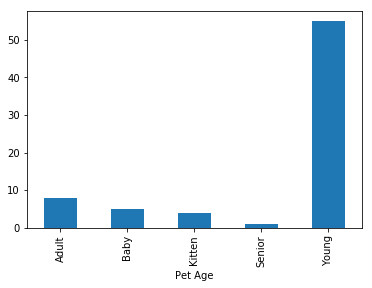

In [59]:
import matplotlib.pyplot as plt
ax = count.plot(kind = 'bar')
plt.show()